(300, 2)

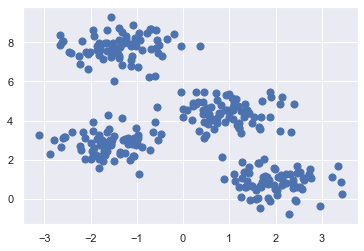

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
X.shape

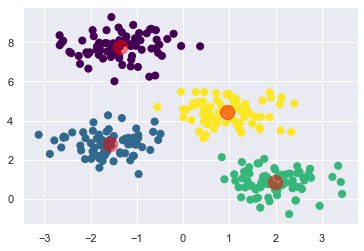

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);


Text(0.5, 0, 'number of clusters, k')

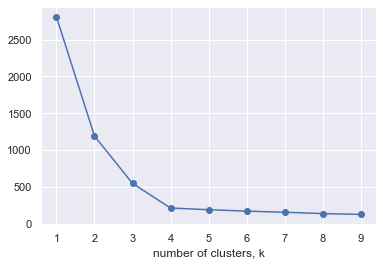

In [9]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')

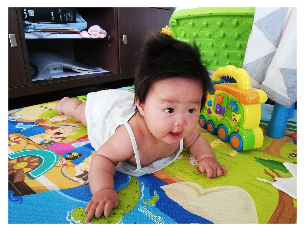

In [5]:
from sklearn.datasets import load_sample_image
import imageio
stella = imageio.imread("stella.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(stella);

In [15]:
stella.shape
stella[0][0]

Array([54, 49, 56], dtype=uint8)

In [10]:
data = stella / 255.0
data = data.reshape(3456 * 4608, 3)
data.shape

(15925248, 3)

15925248

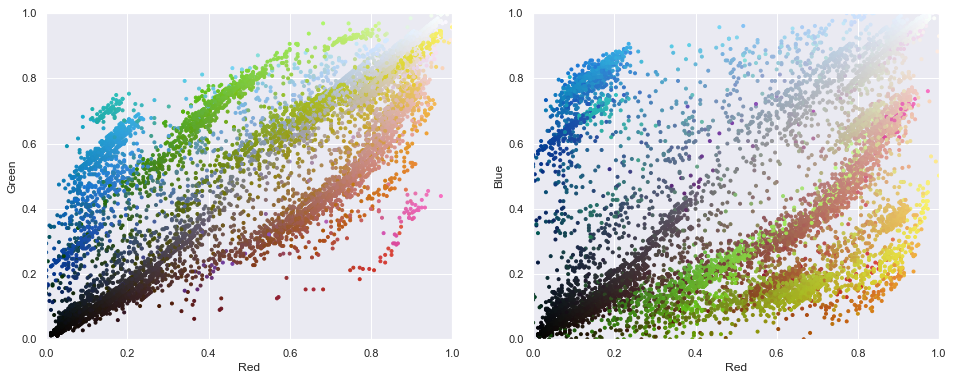

In [18]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);
plot_pixels(data, '')

In [13]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(256)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

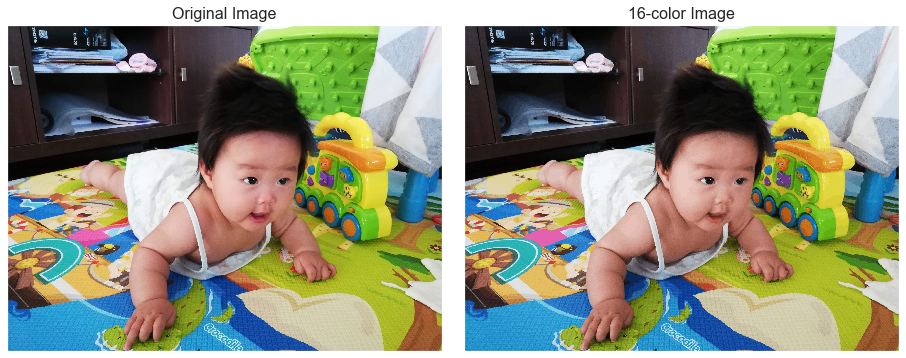

In [14]:
data_recolored = new_colors.reshape(stella.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(stella)
ax[0].set_title('Original Image', size=16)
# data_recolored.shape

ax[1].imshow(data_recolored)
ax[1].set_title('16-color Image', size=16);


In [17]:
recolored_image = data_recolored * 255
recolored_image = recolored_image.astype(np.uint8)
imageio.imwrite('recolored.jpg', recolored_image)

In [13]:
stella.shape

(3456, 4608, 3)